# VisualMIDIcompare

A testing and analysis workflow


## Provide:

- [Spectrogram](https://en.wikipedia.org/wiki/Spectrogram)
- ability to play MIDI files to compare
- ability to convert to .wav using existing tools

Tool to generate a visual representation of a MIDI file. 
Optionally, compare to a second MIDI file by diffing the images

### Steps:

1. Length of the MIDI file (x-axis of image).
2. 88 Keys (y-axis of image).
3. Plot each note on the image.
4. Grayscale to measure velocity (MIDI has 128 levels?)
5. Comparision emphasizes:
	1. notes with no match
	2. notes with differnet on/off points
	3. notes with different velocity
    
### Reason: 

MIDI is a digitial format and can fairly straightforwaly be done numerically. This is not broadly useful to people. 

Existing MIDI editors have a visual editor but it is manual process to extract and line up images, and diff them.

## Implementation:

- Python (jupyter notebook) 
- use the same diff rules and colour as github.
- command line tool

## Optional:

1. Add numeric comparisions
	- summary statistcs
	- note statistics
2. An interface where you can hover over images and get MIDI details
3. Choose output iamge format.
4. Choose to wrap the image (it will be a long image by default)
5. web interface
6. Chouse y-axis scale. Default will be 10px per 1/4 note.

# Imports 

In [68]:
# check environment
import sys
print("Path: {}".format(sys.path))
print("Executable: {}".format(sys.executable))

Path: ['/Volumes/MACSTORE/Users/benjamin/dev/cs499/visualMIDIcompare', '/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Volumes/MACSTORE/Users/benjamin/dev/cs499/visualMIDIcompare/venv/lib/python3.7/site-packages', '/Volumes/MACSTORE/Users/benjamin/dev/cs499/visualMIDIcompare/venv/lib/python3.7/site-packages/IPython/extensions', '/Volumes/MACSTORE/Users/benjamin/.ipython']
Executable: /Volumes/MACSTORE/Users/benjamin/dev/cs499/visualMIDIcompare/venv/bin/python3


In [69]:
from __future__ import print_function

In [70]:
# Librosa Imports
import librosa
import librosa.display
import IPython.display
import numpy as np
import scipy

In [71]:
# Matplotlib Imports
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# Let's bring the files in

In [72]:
# Source1 Audio Path
# source2_audio_path = 'source/source1.wav'
# source1_audio_path = 'tuneBuilder/tuneBuildTest.wav'
source1_audio_path = 'source/Chopin1.wav'

# Source2 Audio Path
# source2_audio_path = 'source/source2.wav'
# source2_audio_path = 'tuneBuilder/tuneBuildTest2.wav'
source2_audio_path = 'source/Chopin2.wav'

## Source1 Track

### Open Source1, get some basic statistics and create a player

In [102]:
# Load source1 track
y, sr = librosa.load(source1_audio_path)

# Get track duration
source1_duration = librosa.get_duration(y=y, sr=sr)

# Get a tuning estimate
# estimate_tuning: Estimate the tuning of an audio time series or spectrogram input
source1_tuning = librosa.estimate_tuning(y=y, sr=sr)

print("File: {} \nDuration: {:2.4f} sec".format(source1_audio_path, source1_duration))
print("Tuning estimate: {}".format(source1_tuning))

# Play back original track
IPython.display.Audio(data=y, rate=sr)

File: source/Chopin1.wav 
Duration: 2.9039 sec
Tuning estimate: 0.020000000000000018


### Let's take a first look at the file

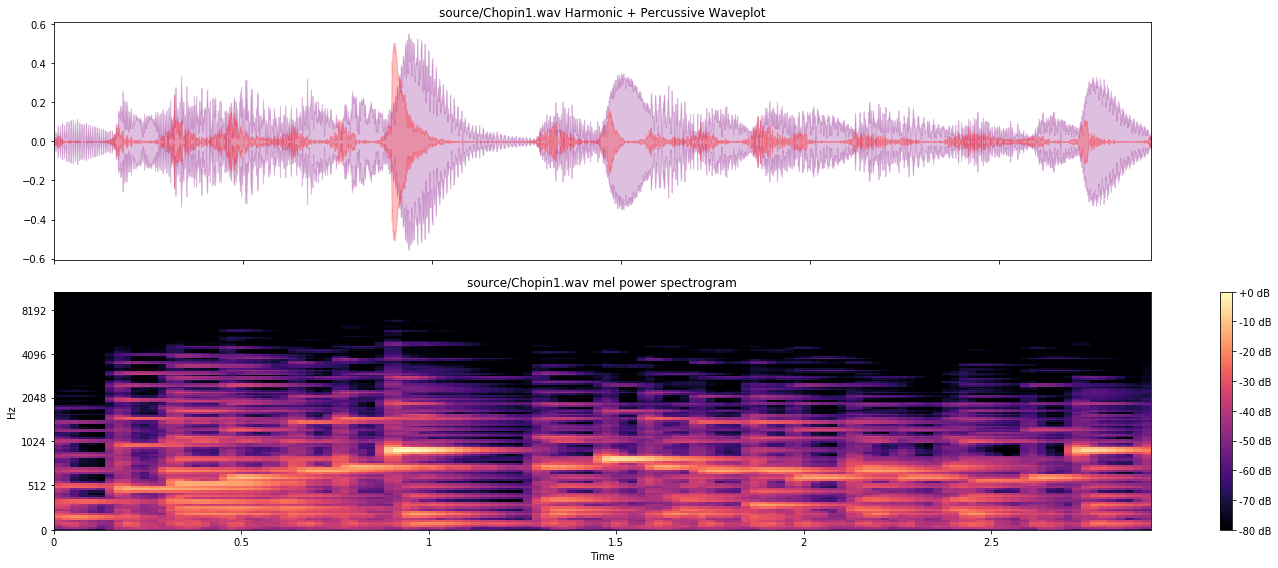

In [74]:
# mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# covert to log scale (dB). Using peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Prepare the graph
plt.figure(figsize=(20,8))

# Display spectrogram on a mel scale
# smaple rate and hop length parameters are used to render the time axis
plt.subplot(2,1,2)
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.savefig('output_images/source1_melSpectrogram.png', dpi=100, bbox_inches='tight')

# Give it a title
plt.title(source1_audio_path + " mel power spectrogram")

# draw a colour bar
plt.colorbar(format='%+02.0f dB')

# Display a waveplot, breaking out harominic and purcussive components
# Same as above but with fewer comments now that we are experiecned 
plt.subplot(2,1,1) # displays first
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveplot(y=y_harm, sr=sr, color='purple', alpha=0.25)
librosa.display.waveplot(y=y_perc, sr=sr, color='r', alpha=0.25)
plt.tick_params(labelbottom=False) # remove axis label (same as spectrogram)
plt.xlabel("", labelpad=10)
plt.colorbar().ax.set_visible(False) # create and hide a colorbar to keep size the same
plt.title(source1_audio_path + ' Harmonic + Percussive Waveplot')

# Plot
plt.tight_layout()

## Source 2 Track

### Open Source2, get some basic statistics and create a player

In [75]:
# Load source2 track
y2, sr2 = librosa.load(source2_audio_path)

# Get track duration
source2_duration = librosa.get_duration(y=y2, sr=sr2)

# Get a tuning estimate
# estimate_tuning: Estimate the tuning of an audio time series or spectrogram input
source2_tuning = librosa.estimate_tuning(y=y2, sr=sr2)

print("File: {} \nDuration: {:2.4f} sec".format(
    source2_audio_path, source2_duration))
print("Tuning estimate: {}".format(source2_tuning))


# Play back original track
IPython.display.Audio(data=y2, rate=sr2)

File: source/Chopin2.wav 
Duration: 2.9039 sec
Tuning estimate: 0.020000000000000018


### Let's take a first look at the file

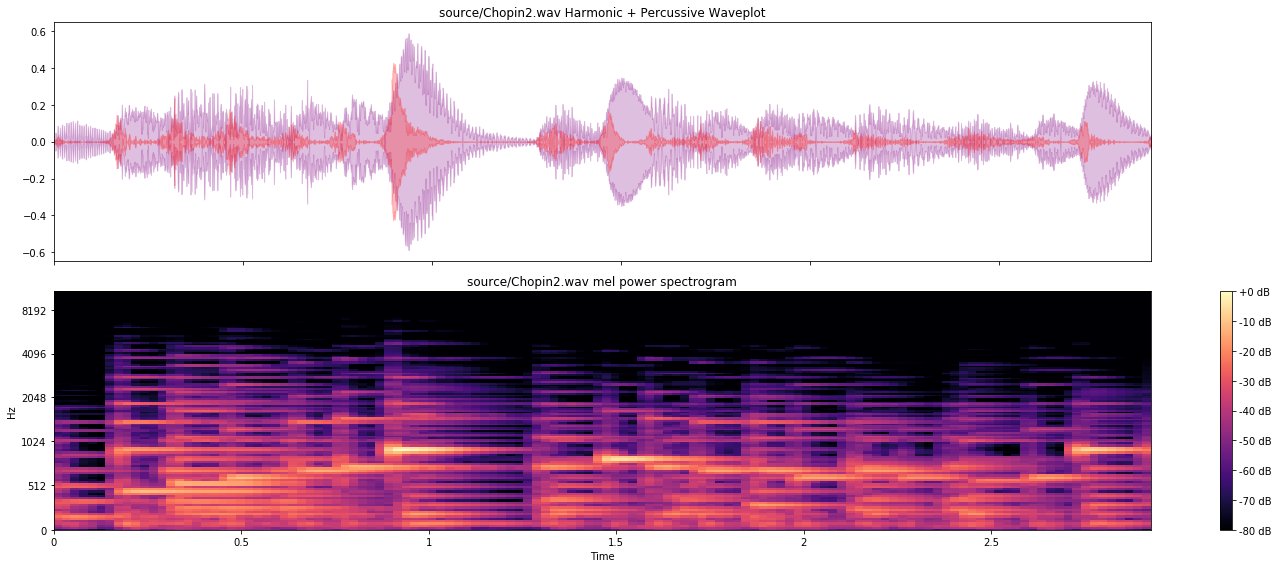

In [76]:
# mel-scaled power (energy-squared) spectrogram
S2 = librosa.feature.melspectrogram(y2, sr=sr2, n_mels=128)

# covert to log scale (dB). Using peak power (max) as reference.
log_S = librosa.power_to_db(S2, ref=np.max)

# Prepare the graph
plt.figure(figsize=(20,8))

# Display spectrogram on a mel scale
plt.subplot(2,1,2)
librosa.display.specshow(log_S, sr=sr2, x_axis='time', y_axis='mel')
plt.savefig('output_images/source2_melSpectrogram.png', dpi=100, bbox_inches='tight')
plt.title(source2_audio_path + " mel power spectrogram")
plt.colorbar(format='%+02.0f dB')

# Display a waveplot, breaking out harominic and purcussive components
plt.subplot(2,1,1) # displays first
y_harm, y_perc = librosa.effects.hpss(y2)
librosa.display.waveplot(y=y_harm, sr=sr2, color='purple', alpha=0.25)
librosa.display.waveplot(y=y_perc, sr=sr2, color='r', alpha=0.25)
plt.tick_params(labelbottom=False) # remove axis label (same as spectrogram)
plt.xlabel("", labelpad=10)
plt.colorbar().ax.set_visible(False) # create and hide a colorbar to keep size the same
plt.title(source2_audio_path + ' Harmonic + Percussive Waveplot')

# Plot
plt.tight_layout()

# Tests

## Spectrograms

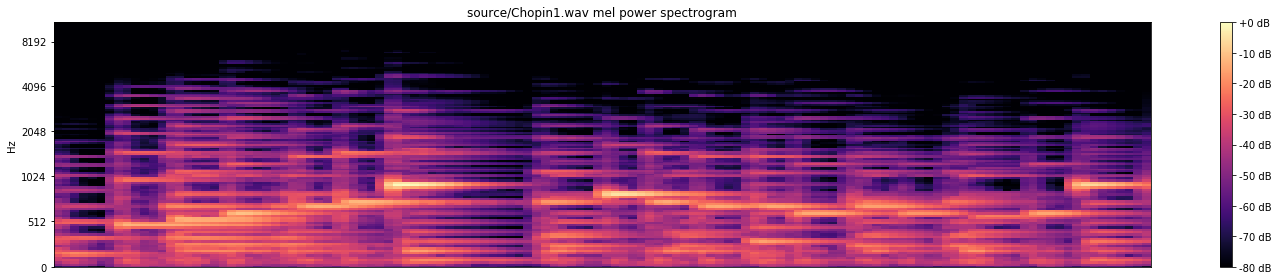

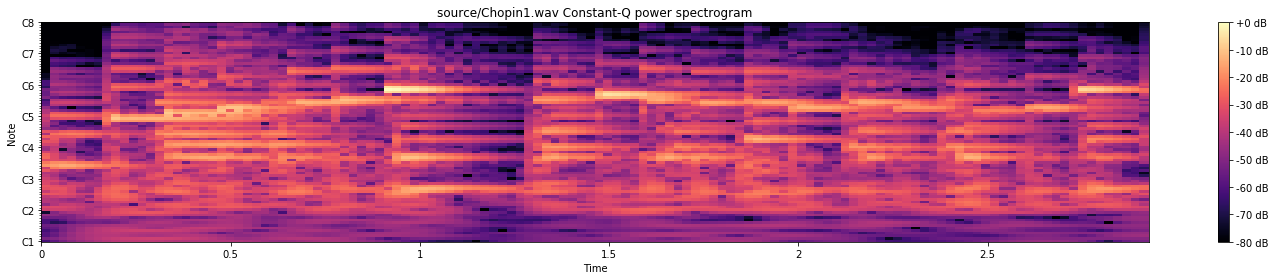

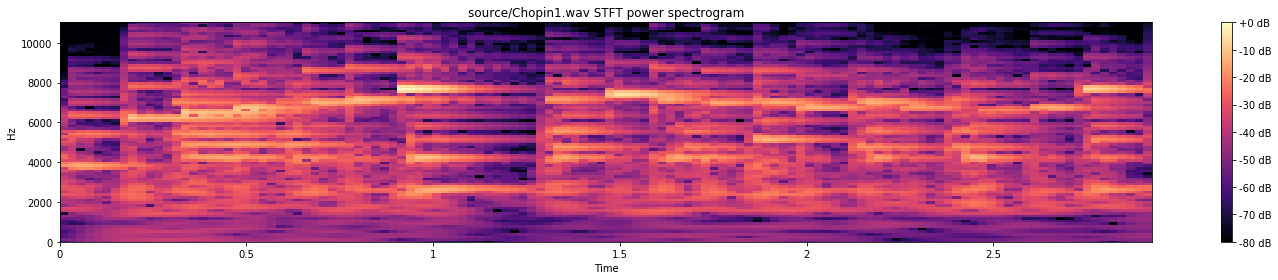

In [122]:
# Prepare the graph
# plt.figure(figsize=(20,10))

# Display spectrogram on a mel scale
plt.figure(figsize=(20,4))
# plt.subplot(3,1,1)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr, y_axis='mel')
plt.title(source1_audio_path + " mel power spectrogram")
plt.colorbar(format='%+02.0f dB')


# Display CQT spectrogram
plt.figure(figsize=(20,4))
# plt.subplot(3,1,2)
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
librosa.display.specshow(CQT, y_axis='cqt_note', x_axis='time')
plt.title(source1_audio_path + ' Constant-Q power spectrogram')
plt.colorbar(format='%+2.0f dB')

# Display STFT spectrogram
plt.figure(figsize=(20,4))
# plt.subplot(3,1,3)
STFT = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

librosa.display.specshow(CQT, y_axis='linear', x_axis='time')
plt.title(source1_audio_path + ' STFT power spectrogram')
plt.colorbar(format='%+2.0f dB')

# Display
plt.tight_layout()

## Chromagrams

## Source1 STFT vs CQT

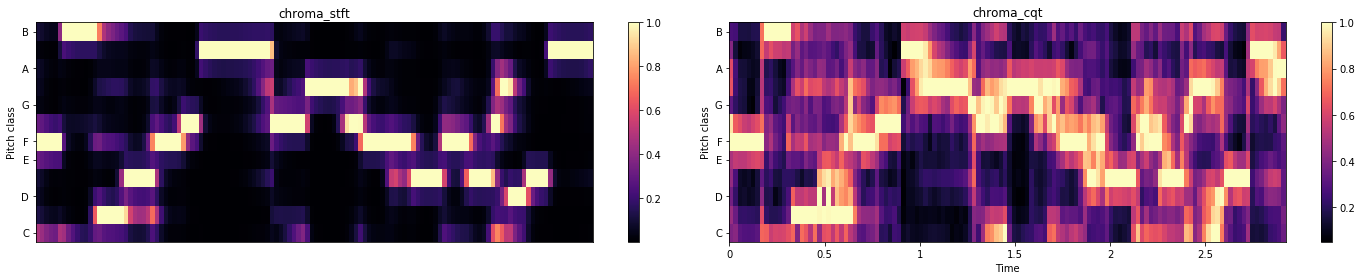

In [79]:
>>> chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr,
...                                           n_chroma=12, n_fft=4096)
>>> chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

>>> plt.figure(figsize=(20,4))
>>> plt.subplot(1,2,1)
>>> librosa.display.specshow(chroma_stft, y_axis='chroma')
>>> plt.title('chroma_stft')
>>> plt.colorbar()
>>> plt.subplot(1,2,2)
>>> librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
>>> plt.title('chroma_cqt')
>>> plt.colorbar()
>>> plt.tight_layout()

## Compare source1 and source2 CQT Chromagram

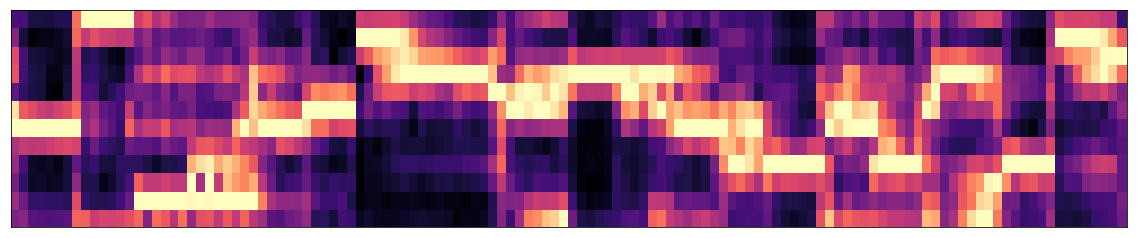

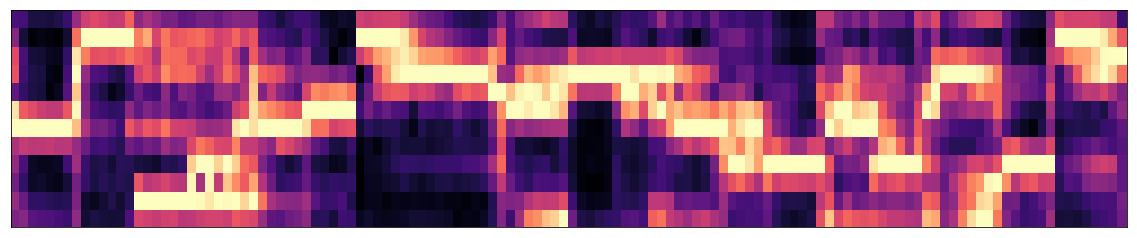

In [81]:
C = librosa.feature.chroma_cqt(y=y, sr=sr)
C2 = librosa.feature.chroma_cqt(y=y2, sr=sr2)
plt.figure(figsize=(20,4))
plt.ioff()
librosa.display.specshow(C)
plt.ioff()
plt.savefig('output_images/source1_chromagram.png', dpi=100, bbox_inches='tight')
plt.figure(figsize=(20,4))
librosa.display.specshow(C2)
plt.ioff()
plt.savefig('output_images/source2_chromagram.png', dpi=100, bbox_inches='tight')

## Compare source1 and source2 STFT Chromagram

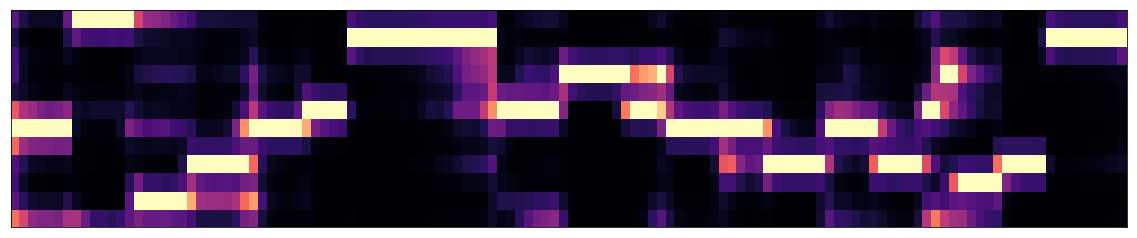

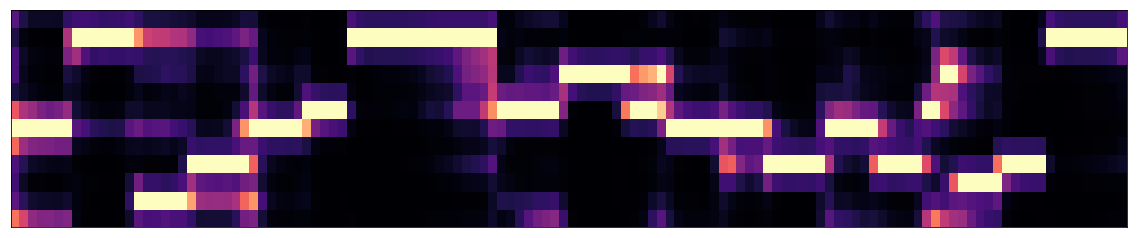

In [82]:
C = librosa.feature.chroma_stft(y=y, sr=sr)
C2 = librosa.feature.chroma_stft(y=y2, sr=sr2)
plt.figure(figsize=(20,4))
plt.ioff()
librosa.display.specshow(C)
plt.ioff()
plt.savefig('output_images/asource1_chromagram.png', dpi=100, bbox_inches='tight')
plt.figure(figsize=(20,4))
librosa.display.specshow(C2)
plt.ioff()
plt.savefig('output_images/source2_chromagram.png', dpi=100, bbox_inches='tight')

# Enhanced chroma and chroma variants
[Enhanced chroma and chroma variants](http://librosa.github.io/librosa/auto_examples/plot_chroma.html#sphx-glr-auto-examples-plot-chroma-py)

## Original

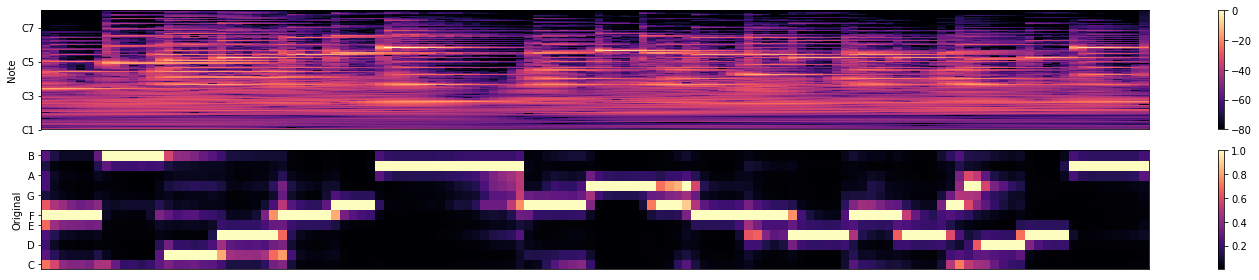

In [124]:
chroma_orig = librosa.feature.chroma_stft(y=y, sr=sr)

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))

plt.figure(figsize=(20,4))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                         y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_orig, y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')
plt.tight_layout()

## Correct Tuning Deviations

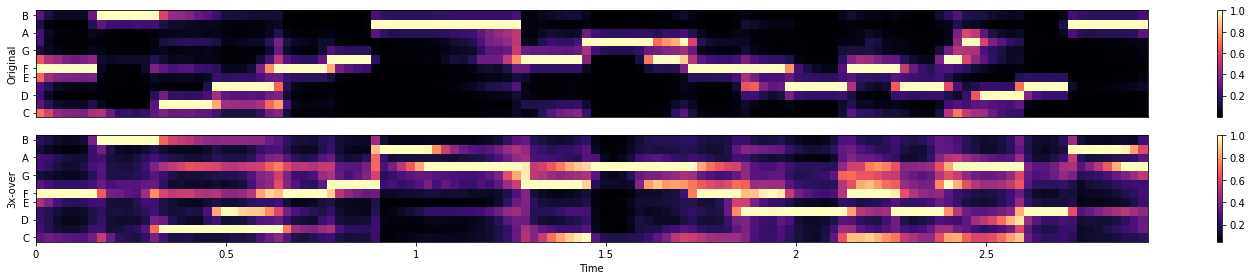

In [127]:
chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)


plt.figure(figsize=(20, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_orig, y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')


plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('3x-over')
plt.tight_layout()

## Isolate harmonic component

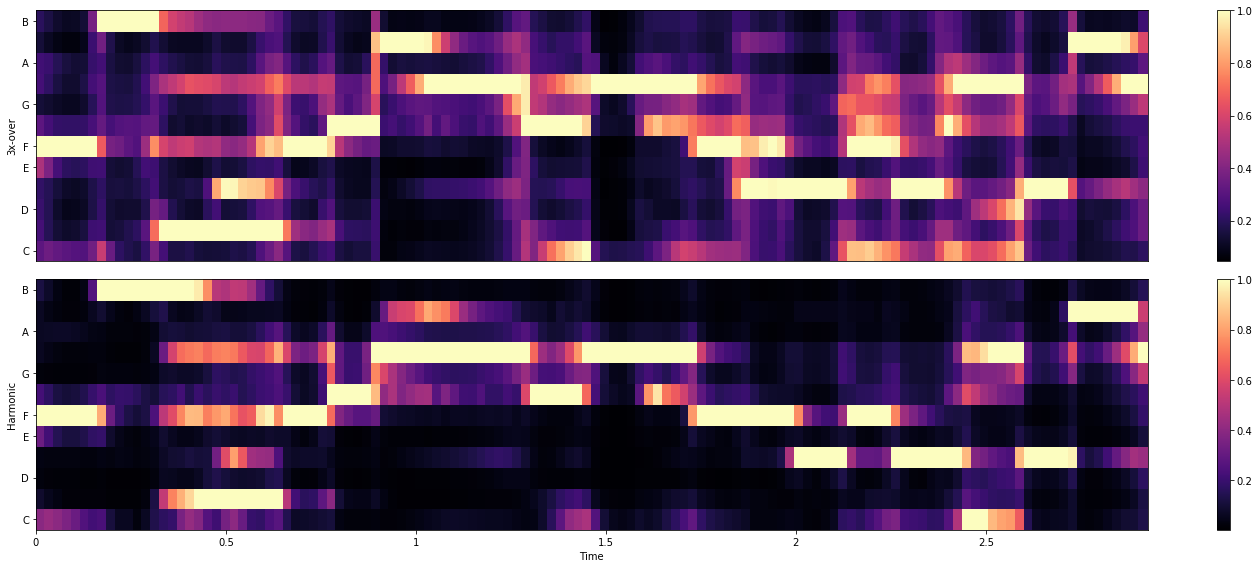

In [131]:
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)


plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_os, y_axis='chroma')
plt.colorbar()
plt.ylabel('3x-over')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os_harm, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Harmonic')
plt.tight_layout()

## Non-local filtering

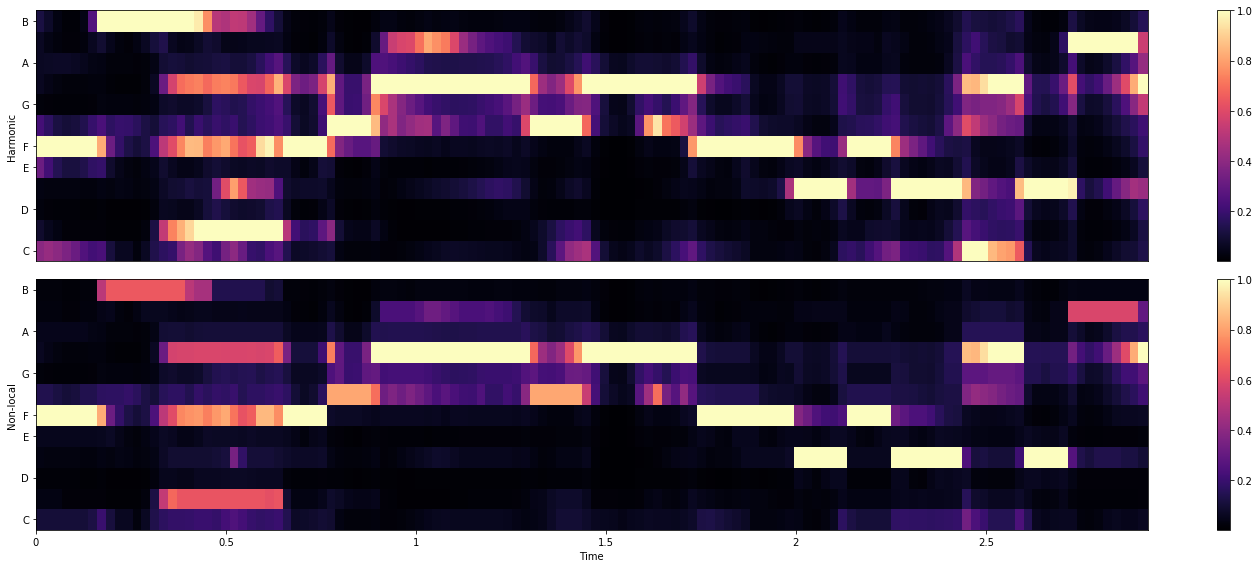

In [132]:
chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))


plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_os_harm, y_axis='chroma')
plt.colorbar()
plt.ylabel('Harmonic')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_filter, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Non-local')
plt.tight_layout()

## Horizontal Median Filter

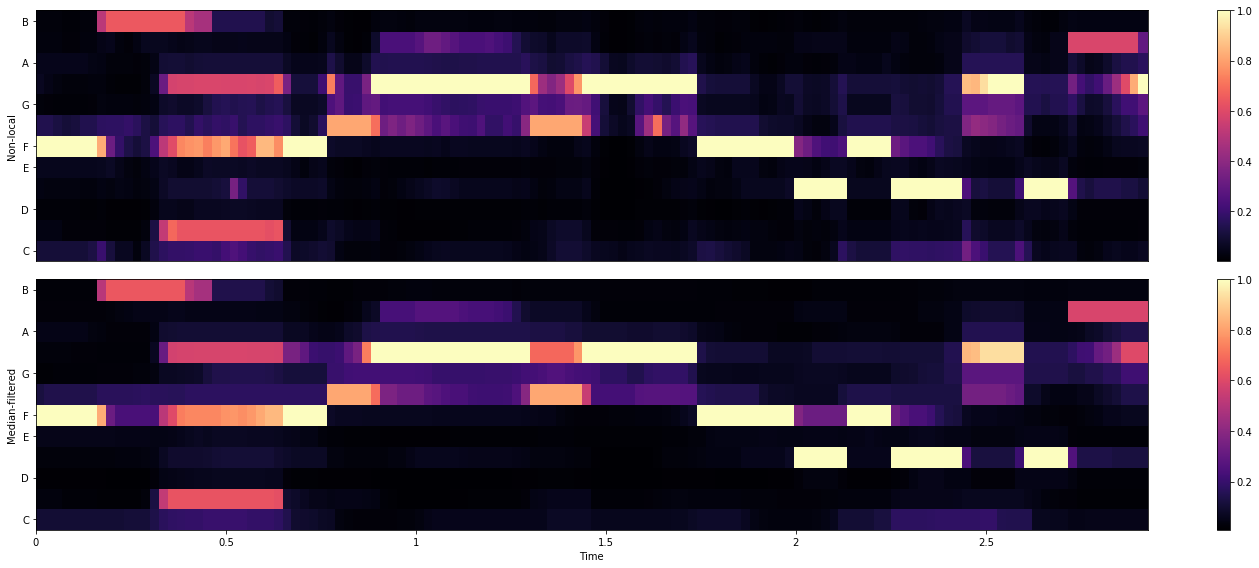

In [133]:
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))


plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_filter, y_axis='chroma')
plt.colorbar()
plt.ylabel('Non-local')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_smooth, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Median-filtered')
plt.tight_layout()

## Before and After

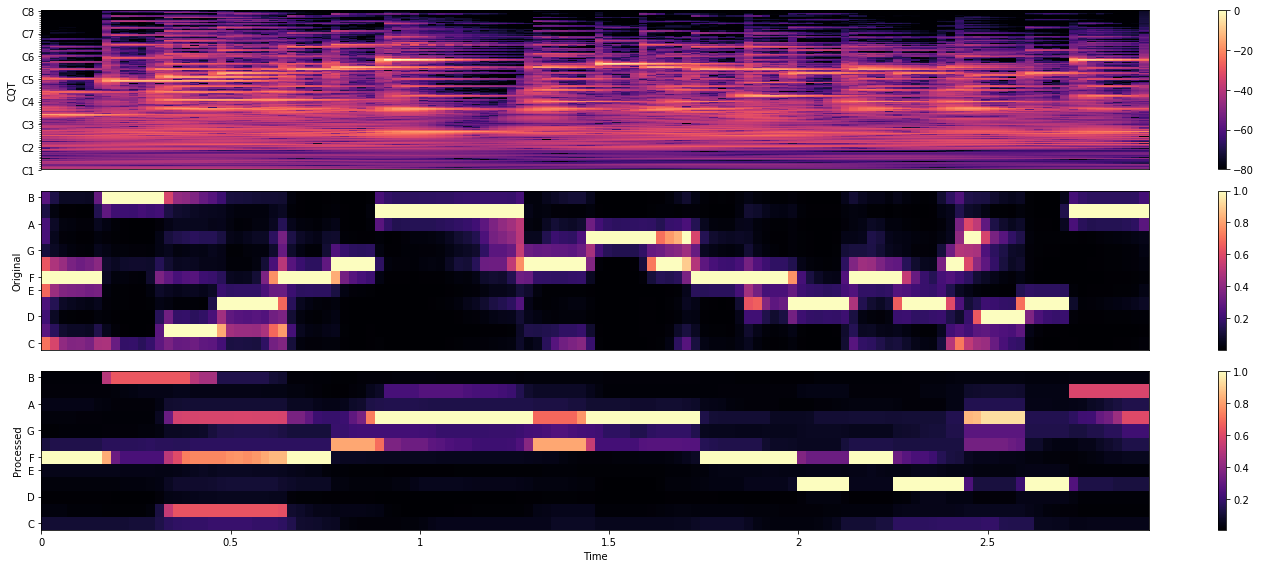

In [134]:
plt.figure(figsize=(20, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                         y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()
plt.ylabel('CQT')
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_orig, y_axis='chroma')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_smooth, y_axis='chroma', x_axis='time')
plt.ylabel('Processed')
plt.colorbar()
plt.tight_layout()
plt.show()

# Applying CENS features

## Source1

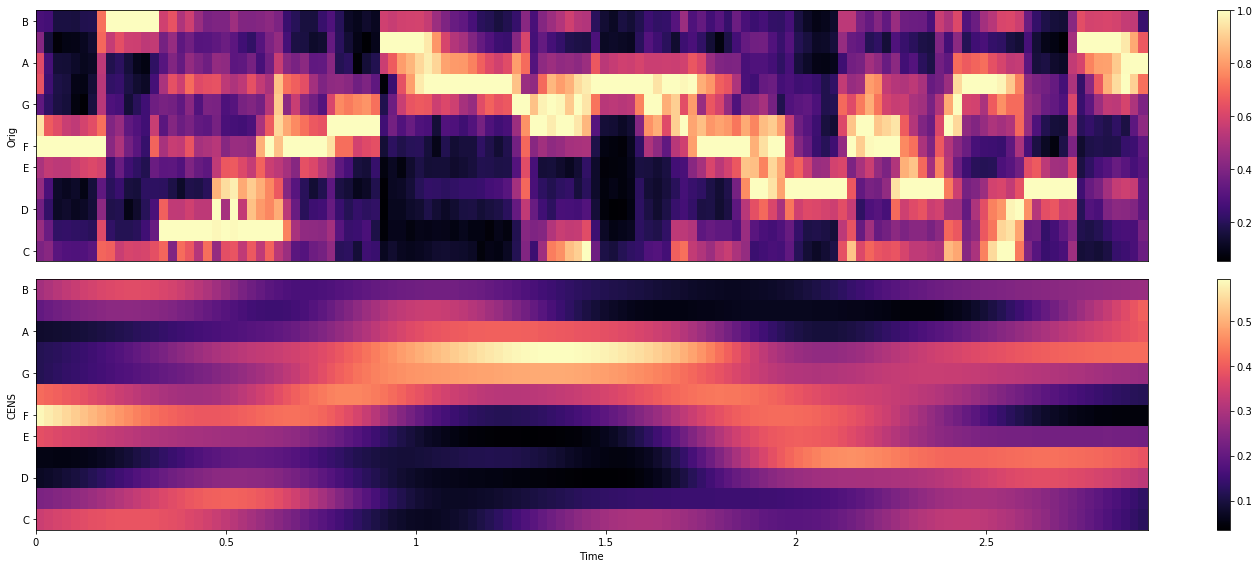

In [140]:
chromagram_cens = librosa.feature.chroma_cens(y=y, sr=sr)


plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(chromagram_cqt, y_axis='chroma')
plt.colorbar()
plt.ylabel('Orig')

plt.subplot(2, 1, 2)
librosa.display.specshow(chromagram_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('CENS')
plt.tight_layout()

## Source2

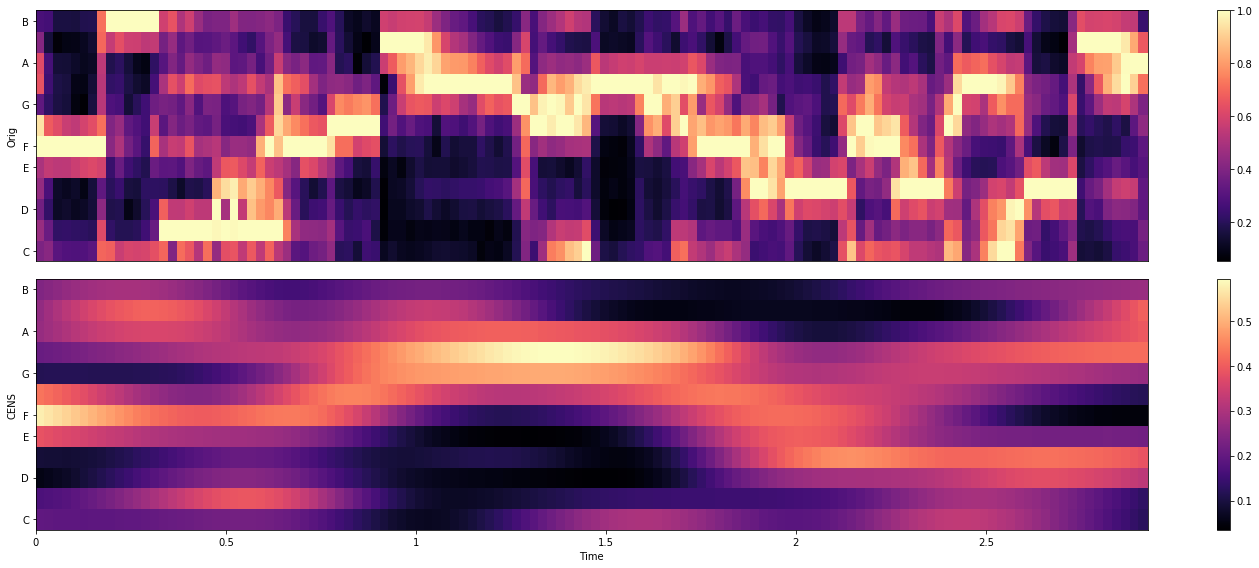

In [139]:
chromagram_cens = librosa.feature.chroma_cens(y=y2, sr=sr2)


plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(chromagram_cqt, y_axis='chroma')
plt.colorbar()
plt.ylabel('Orig')

plt.subplot(2, 1, 2)
librosa.display.specshow(chromagram_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('CENS')
plt.tight_layout()

## Apply filter to CENS

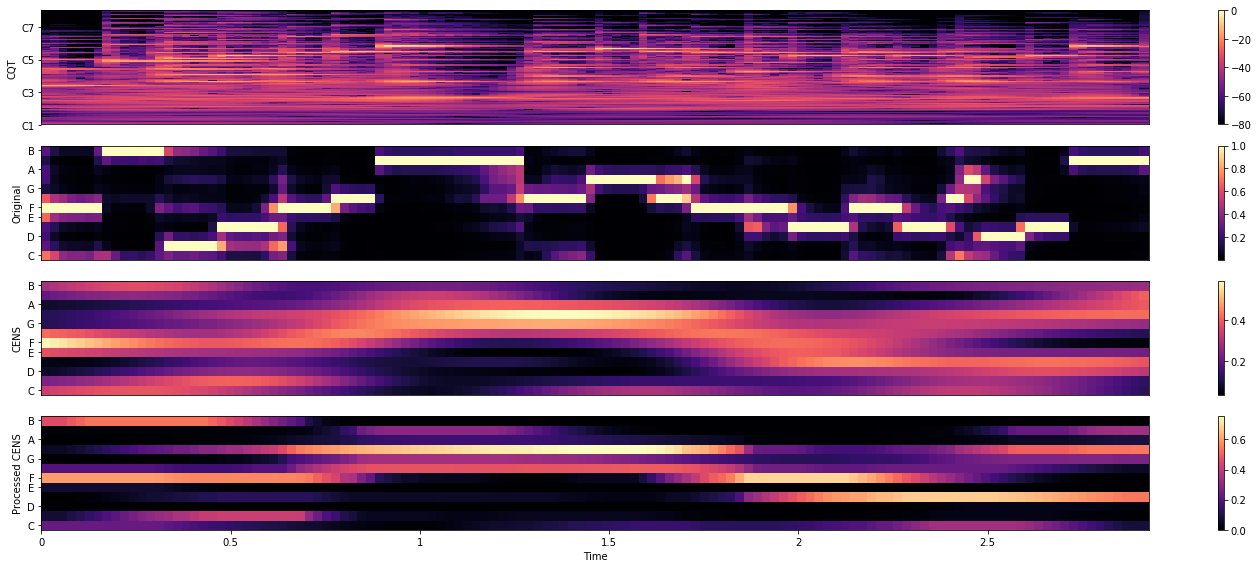

In [141]:
# chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
# chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)

y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cens(y=y_harm, sr=sr, bins_per_octave=12*3)

chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))

chroma_smooth_CENS = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))

plt.figure(figsize=(20, 8))
plt.subplot(4, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                         y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()
plt.ylabel('CQT')
plt.subplot(4, 1, 2)
librosa.display.specshow(chroma_orig, y_axis='chroma')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(4, 1, 3)
librosa.display.specshow(chromagram_cens, y_axis='chroma')
plt.ylabel('CENS')
plt.colorbar()
plt.subplot(4, 1, 4)
librosa.display.specshow(chroma_smooth_CENS, y_axis='chroma', x_axis='time')
plt.ylabel('Processed CENS')
plt.colorbar()
plt.tight_layout()
plt.show()

# Applying chroma enchancement techniques to source files

## Source1

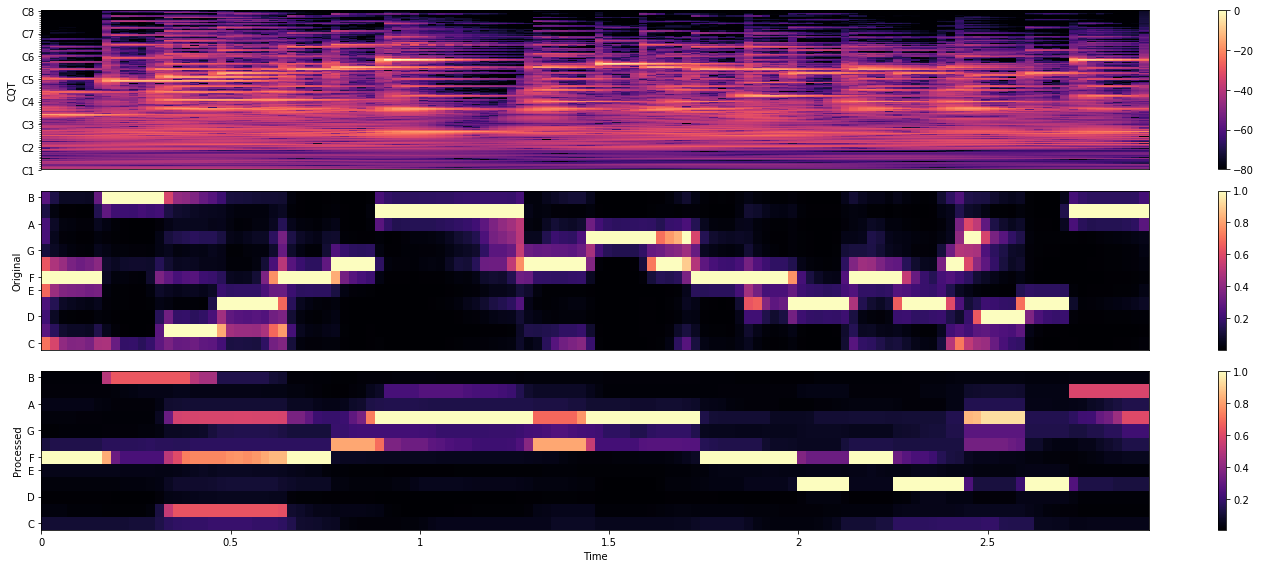

In [143]:
# chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
# chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)

y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)

chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))

chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))

plt.figure(figsize=(20, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                         y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()
plt.ylabel('CQT')
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_orig, y_axis='chroma')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_smooth, y_axis='chroma', x_axis='time')
plt.ylabel('Processed')
plt.colorbar()
plt.tight_layout()
plt.show()

## Source2

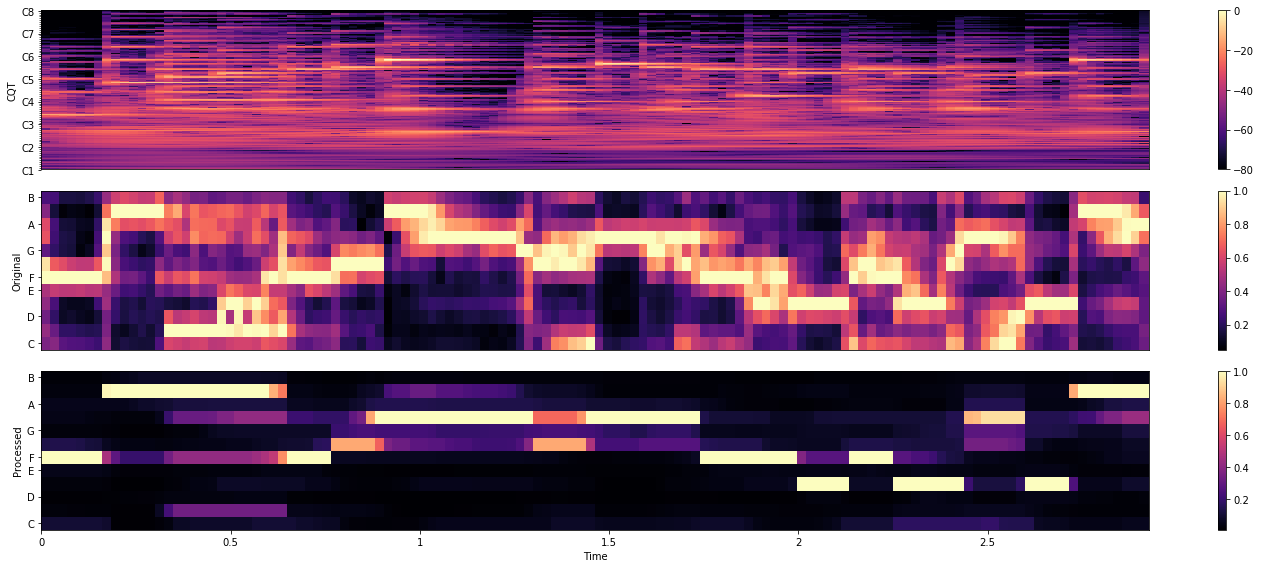

In [142]:
chroma_orig_2 = librosa.feature.chroma_cqt(y=y2, sr=sr2)

# And for comparison, we'll show the CQT matrix as well.
C2 = np.abs(librosa.cqt(y=y2, sr=sr2, bins_per_octave=12*3, n_bins=7*12*3))

y_harm_2 = librosa.effects.harmonic(y=y2, margin=8)
chroma_os_harm_2 = librosa.feature.chroma_cqt(
    y=y_harm_2, sr=sr2, bins_per_octave=12*3)

chroma_filter_2 = np.minimum(chroma_os_harm_2,
                             librosa.decompose.nn_filter(chroma_os_harm_2,
                                                         aggregate=np.median,
                                                         metric='cosine'))

chroma_smooth_2 = scipy.ndimage.median_filter(chroma_filter_2, size=(1, 9))

plt.figure(figsize=(20, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C2, ref=np.max),
                         y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()
plt.ylabel('CQT')
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_orig_2, y_axis='chroma')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_smooth_2, y_axis='chroma', x_axis='time')
plt.ylabel('Processed')
plt.colorbar()

plt.tight_layout()
plt.show()

# Output comparisions for testing

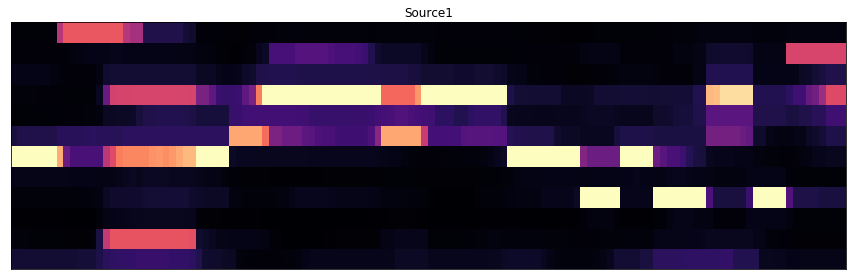

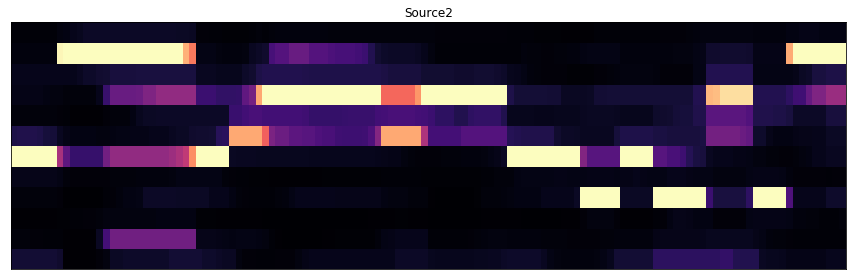

In [94]:
plt.figure(figsize=(12,4))
librosa.display.specshow(chroma_smooth)
plt.savefig('output_images/source1_chromagram.png', dpi=100, bbox_inches='tight')
plt.title("Source1")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,4))
librosa.display.specshow(chroma_smooth_2)
plt.savefig('output_images/source2_chromagram.png', dpi=100, bbox_inches='tight')
plt.title("Source2")
plt.tight_layout()
plt.show()

# Run imageDiff

In [95]:
# %run -i imageDiff/image_diff.py --first ../visualMIDIcompare/output_images/source1_chromagram.png --second ../visualMIDIcompare/output_images/source2_chromagram.png

SSIM: 0.9220794266585013


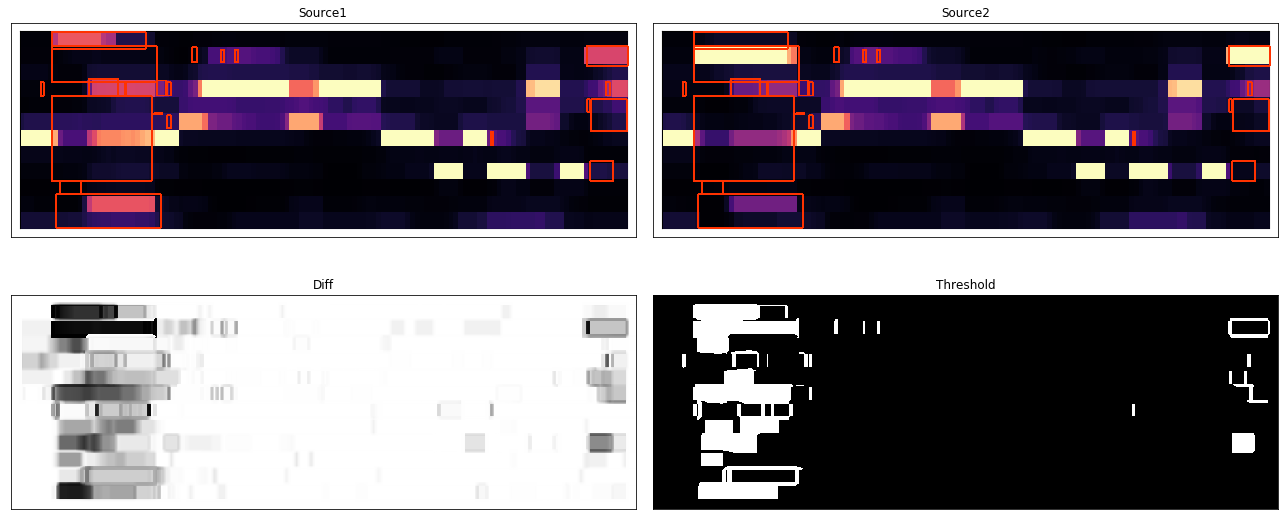

In [96]:
## import the necessary packages
from skimage.measure import compare_ssim
import imutils
import cv2

# load the two input images
imageA = cv2.imread("../visualMIDIcompare/output_images/source1_chromagram.png")
imageB = cv2.imread("../visualMIDIcompare/output_images/source2_chromagram.png")

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)


# compute the Structural Similiarity Index (SSM) between the two
# images, ensuring that the difference image is returned
# score can fall betweeen [-1, 1] with 1 being a perfect match
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding countours to
# obtain the regiions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
                       cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
    # compute the bounding box of hte contour and then draw the
    # bounding box on both input to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 50, 255), 2)
    cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 50, 255), 2)

# show the output images
plt.figure(figsize=(18, 8))

plt.subplot(2, 2, 1)
plt.tick_params(bottom= False, left=False, labelleft=False, labelbottom=False)
plt.imshow(cv2.cvtColor(imageA, cv2.COLOR_BGR2RGB))
plt.title("Source1")

plt.subplot(2, 2, 2)
plt.tick_params(bottom= False, left=False, labelleft=False, labelbottom=False)
plt.imshow(cv2.cvtColor(imageB, cv2.COLOR_BGR2RGB))
plt.title("Source2")

plt.subplot(2, 2, 3)
plt.tick_params(bottom= False, left=False, labelleft=False, labelbottom=False)
plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
plt.title("Diff")

plt.subplot(2, 2, 4)
plt.tick_params(bottom= False, left=False, labelleft=False, labelbottom=False)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title("Threshold")

plt.tight_layout()

